<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

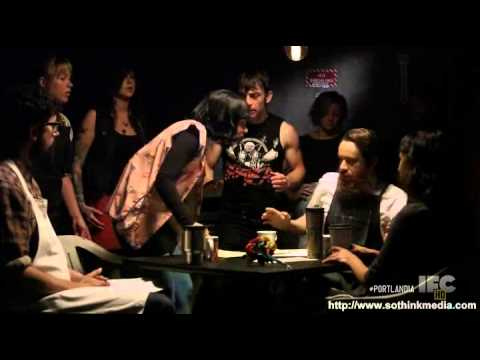

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\Karl\\Documents\\lambda\\u4s1\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
# Start here 

In [5]:
# Checking shape of df

shops.shape

(7616, 3)

In [6]:
# Checking star_rating column values to clean df

shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [7]:
# Dropping "star rating" string from star_rating column, casting as integer

shops['star_rating'] = shops['star_rating'].str[:2].astype(int)

In [8]:
# Creating new column for date, dropping date from full_review_text

# for review in shops['full_review_text']:
#     shops['date'] = review.split()[0]

shops['date'] = ""

for i in range(7616):
    shops['date'][i] = shops['full_review_text'][i].split()[0]

C:\Users\Karl\.conda\envs\u4-s1-nlp\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [9]:
# Casting date as datetime

pd.to_datetime(shops['date'], infer_datetime_format=True)

0      2016-11-25
1      2016-12-02
2      2016-11-30
3      2016-11-25
4      2016-12-03
          ...    
7611   2015-02-19
7612   2016-01-21
7613   2015-04-30
7614   2015-08-02
7615   2015-05-23
Name: date, Length: 7616, dtype: datetime64[ns]

In [10]:
# Dropping date from full_review_text

for i in range(7616):
    shops['full_review_text'][i] = shops['full_review_text'][i].split(maxsplit=1)[1]

C:\Users\Karl\.conda\envs\u4-s1-nlp\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [11]:
shops[ shops['full_review_text'].str.contains('Updated review')]

,coffee_shop_name,full_review_text,star_rating,date
79,Vintage Heart Coffee,Updated review 3 check-ins Cutest little coffe...,5,6/30/2016
127,Vintage Heart Coffee,Updated review 16 check-ins Updating only to s...,5,3/24/2016
231,Mozart’s Coffee Roasters,Updated review 2 check-ins Buy 4 bags of coffe...,5,11/27/2016
241,Mozart’s Coffee Roasters,Updated review 1 check-in I give This 4-stars ...,4,5/14/2016
364,Summermoon Coffee Bar,Updated review 2 check-ins Plenty of different...,5,9/25/2016
...,...,...,...,...
7428,Hot Mama’s Cafe,Updated review Used to love this place but are...,1,4/26/2015
7485,Hot Mama’s Cafe,Updated review Props to the Owner Mama of Hot ...,5,9/7/2010
7538,The Steeping Room,Updated review Today the strada was a nasty so...,2,10/10/2015
7554,The Steeping Room,Updated review I have to downgrade my review. ...,1,8/31/2015


In [12]:
# Creating new column for "Updated Reviews"

shops['updated_review'] = ""

for i in range(7616):
    if 'Updated review' in shops['full_review_text'][i]:
        shops['updated_review'][i] = 1
        shops['full_review_text'][i] = shops['full_review_text'][i].split(maxsplit=2)[2]
    else:
        shops['updated_review'][i] = 0

C:\Users\Karl\.conda\envs\u4-s1-nlp\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Karl\.conda\envs\u4-s1-nlp\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Karl\.conda\envs\u4-s1-nlp\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [13]:
# Creating new column for check-ins

shops['check_ins'] = ""

for i in range(7616):
    if 'check-in' in shops['full_review_text'][i].split(maxsplit=2)[1]:
        shops['check_ins'][i] = shops['full_review_text'][i].split(maxsplit=2)[0]
        shops['full_review_text'][i] = shops['full_review_text'][i].split(maxsplit=2)[2]
    elif 'check-ins' in shops['full_review_text'][i].split(maxsplit=2)[1]:
        shops['check_ins'][i] = shops['full_review_text'][i].split(maxsplit=2)[0]
        shops['full_review_text'][i] = shops['full_review_text'][i].split(maxsplit=2)[2]
    else:
        shops['check_ins'][i] = 0

C:\Users\Karl\.conda\envs\u4-s1-nlp\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Karl\.conda\envs\u4-s1-nlp\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Karl\.conda\envs\u4-s1-nlp\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [14]:
# Casting updated_review and check_ins as integers

shops['updated_review'].astype(int)
shops['check_ins'].astype(int)

0       1
1       0
2       1
3       0
4       1
       ..
7611    0
7612    0
7613    0
7614    0
7615    0
Name: check_ins, Length: 7616, dtype: int32

In [15]:
shops[ shops['full_review_text'].str.contains("Listed in") ]

,coffee_shop_name,full_review_text,star_rating,date,updated_review,check_ins
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016,0,0
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclectic an...,4,11/30/2016,0,1
6,The Factory - Cafe With a Soul,"Listed in ""Nuptial Coffee Bliss!"", Anderson La...",4,10/27/2016,0,2
10,The Factory - Cafe With a Soul,Listed in Americano This is not your average c...,4,10/22/2016,0,1
12,The Factory - Cafe With a Soul,Listed in 2016 - The Third Time is a Charm! Th...,3,11/17/2016,0,1
...,...,...,...,...,...,...
7584,The Steeping Room,"Listed in Gluttony or Sloth?, Old Yelper, new ...",5,4/30/2014,1,17
7586,The Steeping Room,"Listed in So, you wanna eat in North Central A...",4,4/21/2013,0,0
7587,The Steeping Room,Listed in 100 Yelp Review Challenge I came her...,4,3/6/2013,0,2
7595,The Steeping Room,Listed in Vegan and the Beast I've been here s...,4,1/9/2013,0,4


In [16]:
# Creating column listed_elsewhere. Wanted to remove this from full_review_text, but can't figure out how to 
# parse for the entire df. Instead just going to add "Listed in" to stop words

shops['listed_elsewhere'] = ""

for i in range(7616):
    if 'Listed in' in shops['full_review_text'][i]:
        shops['listed_elsewhere'][i] = 1
    else:    
        shops['listed_elsewhere'][i] = 0

C:\Users\Karl\.conda\envs\u4-s1-nlp\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Karl\.conda\envs\u4-s1-nlp\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,updated_review,check_ins,listed_elsewhere
0,The Factory - Cafe With a Soul,Love love loved the atmosphere! Every corner o...,5,11/25/2016,0,1,0
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016,0,0,1
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclectic an...,4,11/30/2016,0,1,1
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2,11/25/2016,0,0,0
4,The Factory - Cafe With a Soul,They are located within the Northcross mall sh...,4,12/3/2016,0,1,0


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [18]:
# Import statements

from collections import Counter
import re
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

In [19]:
# Defining tokenize function

def tokenize(text):
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    return tokens

In [20]:
# Creating tokens in shops df

shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [21]:
# Creating new column for word count

shops['word_count'] = ""

for i in range(7616):
    shops['word_count'][i] = len(shops['tokens'][i])

C:\Users\Karl\.conda\envs\u4-s1-nlp\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
# Creating good/bad column, where 1 is "good" and 2 is "bad"

shops['good_or_bad'] = ""

for i in range(7616):
    if shops['star_rating'][i] <= 3:
        shops['good_or_bad'][i] = 0
    else:
        shops['good_or_bad'][i] = 1



C:\Users\Karl\.conda\envs\u4-s1-nlp\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Karl\.conda\envs\u4-s1-nlp\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [23]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,updated_review,check_ins,listed_elsewhere,tokens,word_count,good_or_bad
0,The Factory - Cafe With a Soul,Love love loved the atmosphere! Every corner o...,5,11/25/2016,0,1,0,"[love, love, loved, the, atmosphere, every, co...",95,1
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016,0,0,1,"[listed, in, date, night, austin, ambiance, in...",45,1
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclectic an...,4,11/30/2016,0,1,1,"[listed, in, brunch, spots, i, loved, the, ecl...",237,1
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2,11/25/2016,0,0,0,"[very, cool, decor, good, drinks, nice, seatin...",67,0
4,The Factory - Cafe With a Soul,They are located within the Northcross mall sh...,4,12/3/2016,0,1,0,"[they, are, located, within, the, northcross, ...",111,1


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [24]:
# Tokenizer pipe

tokenizer = Tokenizer(nlp.vocab)

tokens_good = []
tokens_bad = []

for doc in tokenizer.pipe(shops[ shops['good_or_bad'] == 1]['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens_good.append(doc_tokens)
    
for doc in tokenizer.pipe(shops[ shops['good_or_bad'] == 0]['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens_bad.append(doc_tokens)

In [25]:
shops[ shops['good_or_bad'] == 1]['tokens'] = tokens_good
shops[ shops['good_or_bad'] == 0]['tokens'] = tokens_bad

C:\Users\Karl\.conda\envs\u4-s1-nlp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Karl\.conda\envs\u4-s1-nlp\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
def count(docs):
    
        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

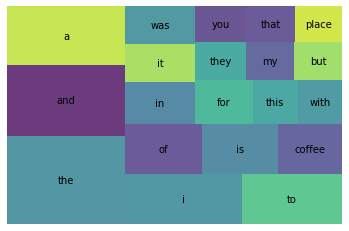

In [27]:
import squarify
import matplotlib.pyplot as plt


wc = count(shops[ shops['good_or_bad'] == 1]['tokens'])
wc_top20 = wc[ wc['rank'] <= 20]
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show;

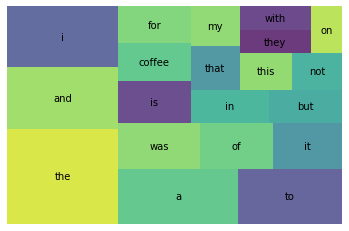

In [28]:
wc = count(shops[ shops['good_or_bad'] == 0]['tokens'])
wc_top20 = wc[ wc['rank'] <= 20]
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show;

In [29]:
STOP_WORDS = nlp.Defaults.stop_words.union(["coffee", "it's", "i'm", "i've", "got"])

In [30]:
tokens_good = []

for doc in tokenizer.pipe(shops[ shops['good_or_bad'] == 1]['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
            
    tokens_good.append(doc_tokens)

shops[ shops['good_or_bad'] == 1]['tokens'] = tokens_good

C:\Users\Karl\.conda\envs\u4-s1-nlp\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
tokens_bad = []

for doc in tokenizer.pipe(shops[ shops['good_or_bad'] == 0]['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
            
    tokens_bad.append(doc_tokens)

shops[ shops['good_or_bad'] == 0]['tokens'] = tokens_bad

C:\Users\Karl\.conda\envs\u4-s1-nlp\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


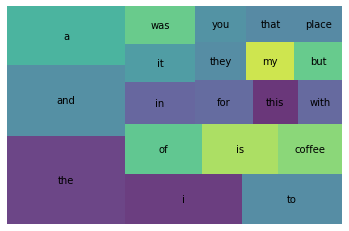

In [32]:
wc = count(shops[ shops['good_or_bad'] == 1]['tokens'])

wc_top20 = wc[ wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show;

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

